**<h1> Mortality Predictions in ICU using ANN** 
    
Patients admitted to the ICU suffer from critical illness or injury and are at high risk of dying. ICU mortality rates differ widely depending on the underlying disease process, with death rates as low as 1 in 20 for patients admitted following elective surgery, and as high as 1 in 4 for patients with respiratory diseases. The risk of death can be approximated by evaluating the severity of a patient’s illness as determined by important physiologic, clinical, and demographic determinants.

![title](heart.png)

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd
import math 
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, auc
import keras

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualisations
%matplotlib inline
sns.set_style( 'white' )


Using TensorFlow backend.


In [2]:
df = pd.read_csv(r'C:\Users\USER\Downloads\Researchs on Mortality Prediction in ICU\Mortality Prediction in ICU\train.csv', encoding = 'utf-8')

In [3]:
import sklearn
print(sklearn.__version__)

0.24.2


In [4]:
labels = pd.read_csv(r'C:\Users\USER\Downloads\Researchs on Mortality Prediction in ICU\Mortality Prediction in ICU\\labels.csv', encoding = 'utf-8')

**<h2> Exploratory Data Analysis**

Henceforth, we will be doing the exploratory data analysis in order to identify the significant parameters contributing to the mortality rate and neglecting the rest.

In [5]:
df.head()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
0,77.0,31.0,46.0,54,2.973333,10.500000,0.7,154.0,0.750000,58.795833,...,17.428571,97.250000,116.891892,37.357143,2.1,0.14,171.052632,10.300000,80.060976,7.387273
1,77.0,31.0,46.0,76,2.973333,18.333333,0.7,154.0,1.100000,58.897059,...,19.000000,96.833333,113.411765,36.939130,2.1,0.14,151.560976,11.266667,80.670588,7.395000
2,116.0,83.0,199.5,44,2.500000,4.666667,2.9,154.0,0.333333,67.125000,...,19.000000,95.000000,125.687500,37.800000,2.1,0.14,124.951220,4.700000,56.700000,7.495000
3,105.0,12.0,15.0,68,4.400000,17.666667,0.2,154.0,0.766667,58.795833,...,15.457627,97.250000,116.891892,36.223077,2.1,0.14,545.833333,9.400000,84.600000,7.387273
4,77.0,31.0,46.0,88,3.300000,35.000000,0.7,154.0,1.000000,58.795833,...,19.166667,97.250000,116.891892,36.880000,2.1,0.14,62.131579,4.300000,80.060976,7.387273


In [6]:
df.columns

Index(['ALP', 'ALT', 'AST', 'Age', 'Albumin', 'BUN', 'Bilirubin',
       'Cholesterol', 'Creatinine', 'DiasABP', 'FiO2', 'GCS', 'Gender',
       'Glucose', 'HCO3', 'HCT', 'HR', 'Height', 'ICUType', 'K', 'Lactate',
       'MAP', 'MechVent', 'Mg', 'NIDiasABP', 'NIMAP', 'NISysABP', 'Na',
       'PaCO2', 'PaO2', 'Platelets', 'RecordID', 'RespRate', 'SaO2', 'SysABP',
       'Temp', 'TroponinI', 'TroponinT', 'Urine', 'WBC', 'Weight', 'pH'],
      dtype='object')

In [7]:
df.shape

(3999, 42)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ALP          3999 non-null   float64
 1   ALT          3999 non-null   float64
 2   AST          3999 non-null   float64
 3   Age          3999 non-null   int64  
 4   Albumin      3999 non-null   float64
 5   BUN          3999 non-null   float64
 6   Bilirubin    3999 non-null   float64
 7   Cholesterol  3999 non-null   float64
 8   Creatinine   3999 non-null   float64
 9   DiasABP      3999 non-null   float64
 10  FiO2         3999 non-null   float64
 11  GCS          3999 non-null   float64
 12  Gender       3999 non-null   int64  
 13  Glucose      3999 non-null   float64
 14  HCO3         3999 non-null   float64
 15  HCT          3999 non-null   float64
 16  HR           3999 non-null   float64
 17  Height       3999 non-null   float64
 18  ICUType      3999 non-null   int64  
 19  K     

In [9]:
df.describe()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,...,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,89.259978,91.709903,130.219258,64.247562,2.975942,25.449665,1.216527,152.403601,1.363130,59.262693,...,19.223967,96.940907,118.145550,36.956291,2.368702,0.337362,133.363074,12.521058,82.799384,7.488870
std,70.397850,427.290858,590.482153,17.563142,0.404440,20.586576,2.961385,13.891279,1.406947,9.080069,...,2.074830,2.296143,16.540816,0.727382,2.418656,1.276145,117.304284,6.466063,23.117431,2.986373
min,12.000000,3.000000,6.000000,15.000000,1.100000,2.250000,0.100000,0.000000,0.200000,0.000000,...,10.543478,38.800000,0.000000,21.644615,0.300000,0.010000,0.000000,0.100000,3.500000,6.311667
25%,77.000000,31.000000,46.000000,52.500000,2.973333,13.000000,0.700000,154.000000,0.700000,55.843712,...,19.000000,97.230769,111.099359,36.614286,2.100000,0.125000,74.044118,8.900000,68.201064,7.364142
50%,77.000000,31.000000,46.000000,67.000000,2.973333,19.000000,0.700000,154.000000,0.933333,58.795833,...,19.000000,97.250000,116.891892,36.968750,2.100000,0.140000,111.032258,11.466667,80.060976,7.387273
75%,82.000000,32.250000,49.000000,78.000000,3.000000,30.000000,0.700000,154.000000,1.366667,62.210006,...,19.290323,97.250000,123.504098,37.364401,2.100000,0.140000,160.419207,14.950000,93.040476,7.407500
max,1472.333333,9143.428571,15680.000000,90.000000,5.300000,170.833333,46.366667,330.000000,16.457143,106.666667,...,39.655172,100.000000,181.725000,39.748980,49.200000,24.040000,3082.380952,137.233333,300.000000,128.532500


In [10]:
labels.shape

(3999, 1)

In [11]:
labels

,In-hospital_death
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [12]:
labels["In-hospital_death"].value_counts()

0    3445
1     554
Name: In-hospital_death, dtype: int64

In [13]:
#One Hot encoding
temp  =[]
for i in labels["In-hospital_death"]:
  if i == 0:
    temp.append([1,0])
  else:
    temp.append([0,1])
temp = np.array(temp)

In [14]:
print(temp.shape)

(3999, 2)


In [15]:
new = pd.concat([df , labels] , axis = 1)
print(new.shape)

(3999, 43)


**<h3>Using Correlation heatmap to find important features and their relations with other features.**

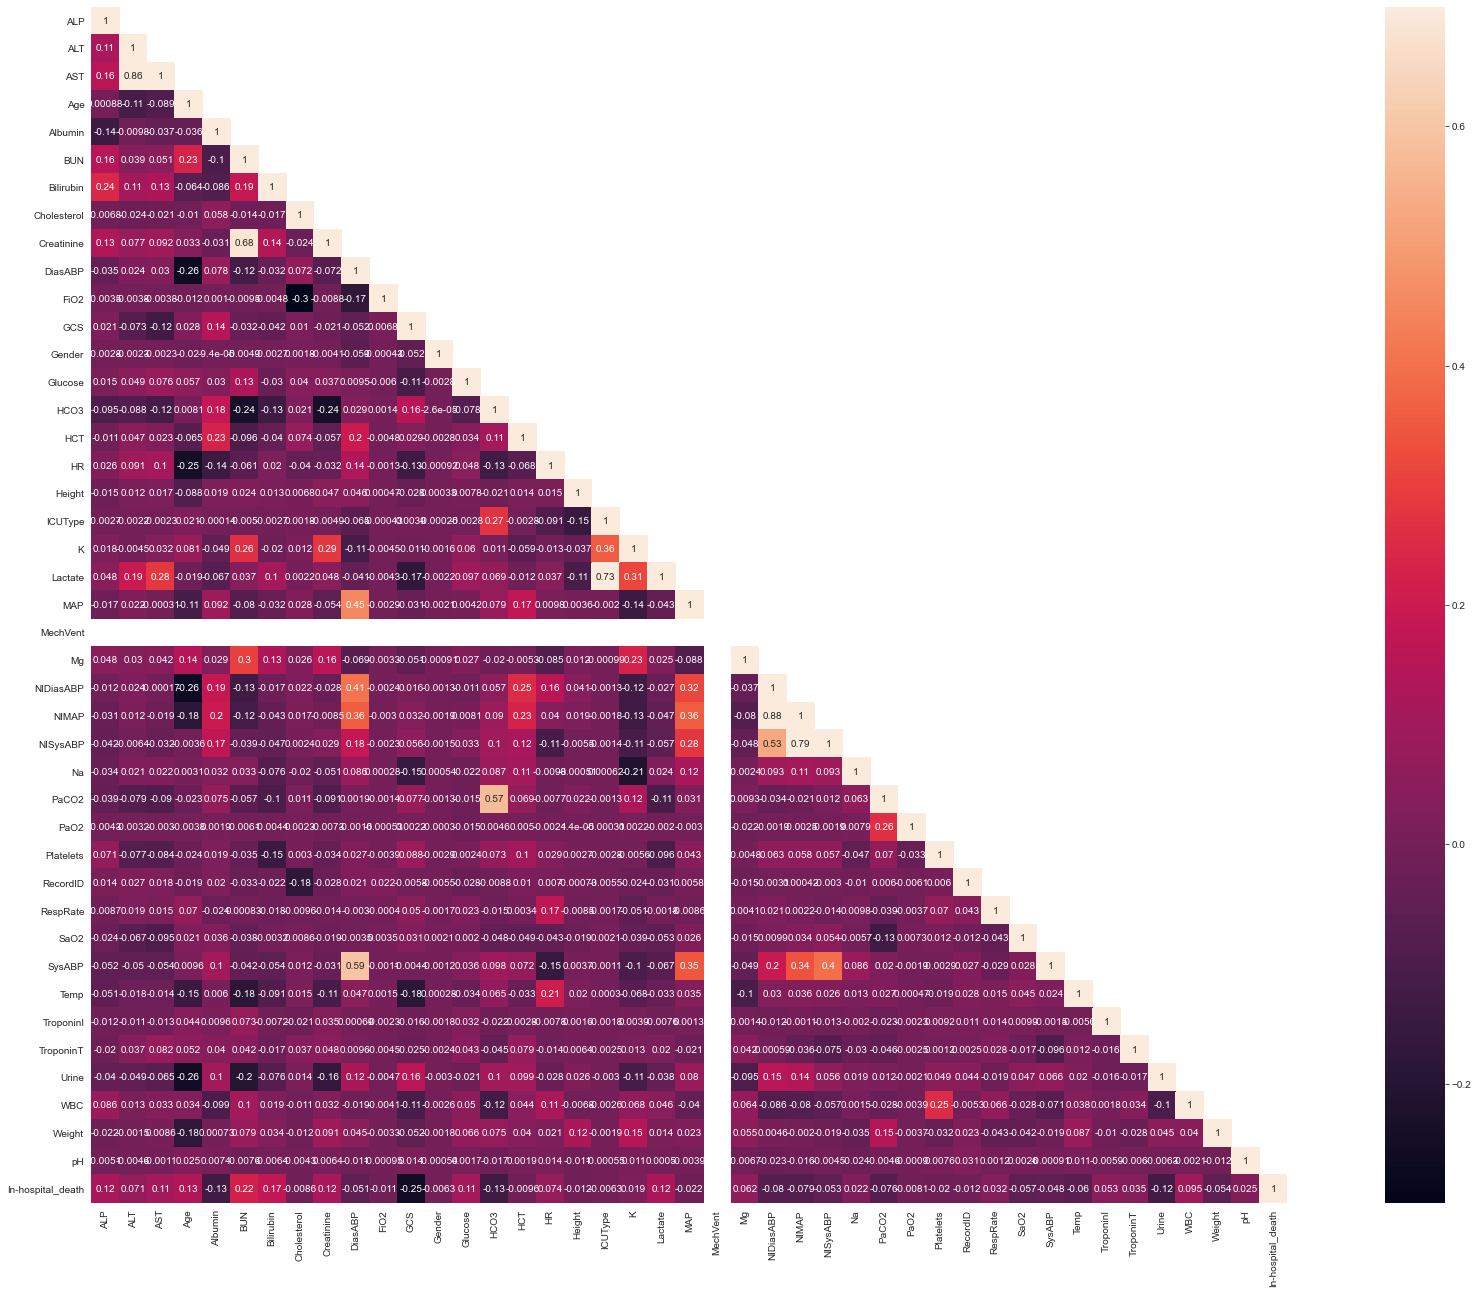

In [16]:
correlation_map = new[new.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(35,22)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)

In [17]:
new_df = new.drop(['In-hospital_death'] , axis =1)
new_df.shape

(3999, 42)

In [18]:
df = new_df

In [19]:
df = df.drop(['Gender','Height', 'ICUType','HCT','PaO2','Cholesterol'] , axis =1)


**<h3> Scaling Data**

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()

# scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

**<H2> Deep Learning Model**

Dataframe df will be given as X parameter and Inhospitaldeath case will be given as Y.

In [21]:
X = df
y = temp

In [22]:
print(X.shape , y.shape)

(3999, 36) (3999, 2)


**<h3>Splitting Dataset**

In [23]:
X_train , X_test , y_train , y_test  = train_test_split(X , y , test_size = 0.2)

In [24]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3199, 36) (800, 36) (3199, 2) (800, 2)


Importing necessary files.

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout , BatchNormalization
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.optimizers import RMSprop, Adam

**<h3> Building ANN Model**

In [26]:
def build_clf(units):
    model = Sequential()

    model.add(Dense(64, input_dim=X_train.shape[1] , activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(196, activation='relu'))
    model.add(Dense(196, activation='relu'))

    model.add(BatchNormalization())

    model.add(Dense(256, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))

    model.compile(optimizer = Adam(lr = 0.0005),loss='binary_crossentropy', metrics=['accuracy'])
    print(model.summary())

# from keras.optimizers import RMSprop

# model = Sequential()

# model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(196, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(196, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))

# model.add(BatchNormalization())

# model.add(Dense(2, activation='sigmoid'))

# model.compile(optimizer=RMSprop(lr=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
# print(model.summary())


In [27]:
from keras.wrappers.scikit_learn import KerasClassifier
model=KerasClassifier(build_fn=build_clf)


In [28]:
from sklearn.model_selection import GridSearchCV
params={'batch_size':[100, 20, 50, 25, 32],
'nb_epoch':[200, 100, 300, 400],
'units':[5,6, 10, 11, 12, 15],}
gs=GridSearchCV(estimator=model, param_grid=params, cv=10)
# now fit the dataset to the GridSearchCV object.
gs = gs.fit(X, y)


Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                2368      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 196)               25284     
_________________________________________________________________
dense_4 (Dense)              (None, 196)               38612     
_________________________________________________________________
batch_normalization_1 (Batch (None, 196)               784       
_________________________________________________________________
dense_5 (Dense)              (None, 256)               50432     
_________________________________________________________________
den

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 64)                2368      
_________________________________________________________________
dense_50 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_51 (Dense)             (None, 196)               25284     
_________________________________________________________________
dense_52 (Dense)             (None, 196)               38612     
_________________________________________________________________
batch_normalization_9 (Batch (None, 196)               784       
_________________________________________________________________
dense_53 (Dense)             (None, 256)               50432     
_________________________________________________________________
dense_54 (Dense)             (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 64)                2368      
_________________________________________________________________
dense_92 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_93 (Dense)             (None, 196)               25284     
_________________________________________________________________
dense_94 (Dense)             (None, 196)               38612     
_________________________________________________________________
batch_normalization_16 (Batc (None, 196)               784       
_________________________________________________________________
dense_95 (Dense)             (None, 256)               50432     
_________________________________________________________________
dense_96 (Dense)             (None, 2)                 514       
Total para

_________________________________________________________________
batch_normalization_22 (Batc (None, 196)               784       
_________________________________________________________________
dense_131 (Dense)            (None, 256)               50432     
_________________________________________________________________
dense_132 (Dense)            (None, 2)                 514       
Total params: 126,314
Trainable params: 125,922
Non-trainable params: 392
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_133 (Dense)            (None, 64)                2368      
_________________________________________________________________
dense_134 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_135 (Dense)            (None, 196)               25284   

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_169 (Dense)            (None, 64)                2368      
_________________________________________________________________
dense_170 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_171 (Dense)            (None, 196)               25284     
_________________________________________________________________
dense_172 (Dense)            (None, 196)               38612     
_________________________________________________________________
batch_normalization_29 (Batc (None, 196)               784       
_________________________________________________________________
dense_173 (Dense)            (None, 256)               50432     
_________________________________________________________________
dense_174 (Dense)            (None, 2)                 514       
Total para

Total params: 126,314
Trainable params: 125,922
Non-trainable params: 392
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_211 (Dense)            (None, 64)                2368      
_________________________________________________________________
dense_212 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_213 (Dense)            (None, 196)               25284     
_________________________________________________________________
dense_214 (Dense)            (None, 196)               38612     
_________________________________________________________________
batch_normalization_36 (Batc (None, 196)               784       
_________________________________________________________________
dense_215 (Dense)            (None, 256)               50432   

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_253 (Dense)            (None, 64)                2368      
_________________________________________________________________
dense_254 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_255 (Dense)            (None, 196)               25284     
_________________________________________________________________
dense_256 (Dense)            (None, 196)               38612     
_________________________________________________________________
batch_normalization_43 (Batc (None, 196)               784       
_________________________________________________________________
dense_257 (Dense)            (None, 256)               50432     
_________________________________________________________________
dense_258 (Dense)            (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_295 (Dense)            (None, 64)                2368      
_________________________________________________________________
dense_296 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_297 (Dense)            (None, 196)               25284     
_________________________________________________________________
dense_298 (Dense)            (None, 196)               38612     
_________________________________________________________________
batch_normalization_50 (Batc (None, 196)               784       
_________________________________________________________________
dense_299 (Dense)            (None, 256)               50432     
_________________________________________________________________
dense_300 (Dense)            (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_337 (Dense)            (None, 64)                2368      
_________________________________________________________________
dense_338 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_339 (Dense)            (None, 196)               25284     
_________________________________________________________________
dense_340 (Dense)            (None, 196)               38612     
_________________________________________________________________
batch_normalization_57 (Batc (None, 196)               784       
_________________________________________________________________
dense_341 (Dense)            (None, 256)               50432     
_________________________________________________________________
dense_342 (Dense)            (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_379 (Dense)            (None, 64)                2368      
_________________________________________________________________
dense_380 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_381 (Dense)            (None, 196)               25284     
_________________________________________________________________
dense_382 (Dense)            (None, 196)               38612     
_________________________________________________________________
batch_normalization_64 (Batc (None, 196)               784       
_________________________________________________________________
dense_383 (Dense)            (None, 256)               50432     
_________________________________________________________________
dense_384 (Dense)            (None, 2)                 514       
Total para

_________________________________________________________________
dense_422 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_423 (Dense)            (None, 196)               25284     
_________________________________________________________________
dense_424 (Dense)            (None, 196)               38612     
_________________________________________________________________
batch_normalization_71 (Batc (None, 196)               784       
_________________________________________________________________
dense_425 (Dense)            (None, 256)               50432     
_________________________________________________________________
dense_426 (Dense)            (None, 2)                 514       
Total params: 126,314
Trainable params: 125,922
Non-trainable params: 392
_________________________________________________________________
None
_______________________________________________________________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_469 (Dense)            (None, 64)                2368      
_________________________________________________________________
dense_470 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_471 (Dense)            (None, 196)               25284     
_________________________________________________________________
dense_472 (Dense)            (None, 196)               38612     
_________________________________________________________________
batch_normalization_79 (Batc (None, 196)               784       
_________________________________________________________________
dense_473 (Dense)            (None, 256)               50432     
_________________________________________________________________
dense_474 (Dense)            (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_517 (Dense)            (None, 64)                2368      
_________________________________________________________________
dense_518 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_519 (Dense)            (None, 196)               25284     
_________________________________________________________________
dense_520 (Dense)            (None, 196)               38612     
_________________________________________________________________
batch_normalization_87 (Batc (None, 196)               784       
_________________________________________________________________
dense_521 (Dense)            (None, 256)               50432     
_________________________________________________________________
dense_522 (Dense)            (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_559 (Dense)            (None, 64)                2368      
_________________________________________________________________
dense_560 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_561 (Dense)            (None, 196)               25284     
_________________________________________________________________
dense_562 (Dense)            (None, 196)               38612     
_________________________________________________________________
batch_normalization_94 (Batc (None, 196)               784       
_________________________________________________________________
dense_563 (Dense)            (None, 256)               50432     
_________________________________________________________________
dense_564 (Dense)            (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_601 (Dense)            (None, 64)                2368      
_________________________________________________________________
dense_602 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_603 (Dense)            (None, 196)               25284     
_________________________________________________________________
dense_604 (Dense)            (None, 196)               38612     
_________________________________________________________________
batch_normalization_101 (Bat (None, 196)               784       
_________________________________________________________________
dense_605 (Dense)            (None, 256)               50432     
_________________________________________________________________
dense_606 (Dense)            (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_643 (Dense)            (None, 64)                2368      
_________________________________________________________________
dense_644 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_645 (Dense)            (None, 196)               25284     
_________________________________________________________________
dense_646 (Dense)            (None, 196)               38612     
_________________________________________________________________
batch_normalization_108 (Bat (None, 196)               784       
_________________________________________________________________
dense_647 (Dense)            (None, 256)               50432     
_________________________________________________________________
dense_648 (Dense)            (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_685 (Dense)            (None, 64)                2368      
_________________________________________________________________
dense_686 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_687 (Dense)            (None, 196)               25284     
_________________________________________________________________
dense_688 (Dense)            (None, 196)               38612     
_________________________________________________________________
batch_normalization_115 (Bat (None, 196)               784       
_________________________________________________________________
dense_689 (Dense)            (None, 256)               50432     
_________________________________________________________________
dense_690 (Dense)            (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_727 (Dense)            (None, 64)                2368      
_________________________________________________________________
dense_728 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_729 (Dense)            (None, 196)               25284     
_________________________________________________________________
dense_730 (Dense)            (None, 196)               38612     
_________________________________________________________________
batch_normalization_122 (Bat (None, 196)               784       
_________________________________________________________________
dense_731 (Dense)            (None, 256)               50432     
_________________________________________________________________
dense_732 (Dense)            (None, 2)                 514       
Total para

_________________________________________________________________
dense_770 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_771 (Dense)            (None, 196)               25284     
_________________________________________________________________
dense_772 (Dense)            (None, 196)               38612     
_________________________________________________________________
batch_normalization_129 (Bat (None, 196)               784       
_________________________________________________________________
dense_773 (Dense)            (None, 256)               50432     
_________________________________________________________________
dense_774 (Dense)            (None, 2)                 514       
Total params: 126,314
Trainable params: 125,922
Non-trainable params: 392
_________________________________________________________________
None
_______________________________________________________________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_811 (Dense)            (None, 64)                2368      
_________________________________________________________________
dense_812 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_813 (Dense)            (None, 196)               25284     
_________________________________________________________________
dense_814 (Dense)            (None, 196)               38612     
_________________________________________________________________
batch_normalization_136 (Bat (None, 196)               784       
_________________________________________________________________
dense_815 (Dense)            (None, 256)               50432     
_________________________________________________________________
dense_816 (Dense)            (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_853 (Dense)            (None, 64)                2368      
_________________________________________________________________
dense_854 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_855 (Dense)            (None, 196)               25284     
_________________________________________________________________
dense_856 (Dense)            (None, 196)               38612     
_________________________________________________________________
batch_normalization_143 (Bat (None, 196)               784       
_________________________________________________________________
dense_857 (Dense)            (None, 256)               50432     
_________________________________________________________________
dense_858 (Dense)            (None, 2)                 514       
Total para

dense_896 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_897 (Dense)            (None, 196)               25284     
_________________________________________________________________
dense_898 (Dense)            (None, 196)               38612     
_________________________________________________________________
batch_normalization_150 (Bat (None, 196)               784       
_________________________________________________________________
dense_899 (Dense)            (None, 256)               50432     
_________________________________________________________________
dense_900 (Dense)            (None, 2)                 514       
Total params: 126,314
Trainable params: 125,922
Non-trainable params: 392
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param # 

dense_937 (Dense)            (None, 64)                2368      
_________________________________________________________________
dense_938 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_939 (Dense)            (None, 196)               25284     
_________________________________________________________________
dense_940 (Dense)            (None, 196)               38612     
_________________________________________________________________
batch_normalization_157 (Bat (None, 196)               784       
_________________________________________________________________
dense_941 (Dense)            (None, 256)               50432     
_________________________________________________________________
dense_942 (Dense)            (None, 2)                 514       
Total params: 126,314
Trainable params: 125,922
Non-trainable params: 392
_________________________________________________________________
No

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_979 (Dense)            (None, 64)                2368      
_________________________________________________________________
dense_980 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_981 (Dense)            (None, 196)               25284     
_________________________________________________________________
dense_982 (Dense)            (None, 196)               38612     
_________________________________________________________________
batch_normalization_164 (Bat (None, 196)               784       
_________________________________________________________________
dense_983 (Dense)            (None, 256)               50432     
_________________________________________________________________
dense_984 (Dense)            (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1021 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_1022 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_1023 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_1024 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_171 (Bat (None, 196)               784       
_________________________________________________________________
dense_1025 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_1026 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1069 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_1070 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_1071 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_1072 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_179 (Bat (None, 196)               784       
_________________________________________________________________
dense_1073 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_1074 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1117 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_1118 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_1119 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_1120 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_187 (Bat (None, 196)               784       
_________________________________________________________________
dense_1121 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_1122 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1159 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_1160 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_1161 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_1162 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_194 (Bat (None, 196)               784       
_________________________________________________________________
dense_1163 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_1164 (Dense)           (None, 2)                 514       
Total para

None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1207 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_1208 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_1209 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_1210 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_202 (Bat (None, 196)               784       
_________________________________________________________________
dense_1211 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_1212 (Dense)           (None, 2)                 514       
Total

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1249 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_1250 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_1251 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_1252 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_209 (Bat (None, 196)               784       
_________________________________________________________________
dense_1253 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_1254 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1291 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_1292 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_1293 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_1294 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_216 (Bat (None, 196)               784       
_________________________________________________________________
dense_1295 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_1296 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1333 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_1334 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_1335 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_1336 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_223 (Bat (None, 196)               784       
_________________________________________________________________
dense_1337 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_1338 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1375 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_1376 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_1377 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_1378 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_230 (Bat (None, 196)               784       
_________________________________________________________________
dense_1379 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_1380 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1423 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_1424 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_1425 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_1426 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_238 (Bat (None, 196)               784       
_________________________________________________________________
dense_1427 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_1428 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1465 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_1466 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_1467 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_1468 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_245 (Bat (None, 196)               784       
_________________________________________________________________
dense_1469 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_1470 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1513 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_1514 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_1515 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_1516 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_253 (Bat (None, 196)               784       
_________________________________________________________________
dense_1517 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_1518 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1555 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_1556 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_1557 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_1558 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_260 (Bat (None, 196)               784       
_________________________________________________________________
dense_1559 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_1560 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1597 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_1598 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_1599 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_1600 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_267 (Bat (None, 196)               784       
_________________________________________________________________
dense_1601 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_1602 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1639 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_1640 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_1641 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_1642 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_274 (Bat (None, 196)               784       
_________________________________________________________________
dense_1643 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_1644 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1681 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_1682 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_1683 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_1684 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_281 (Bat (None, 196)               784       
_________________________________________________________________
dense_1685 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_1686 (Dense)           (None, 2)                 514       
Total para

Total params: 126,314
Trainable params: 125,922
Non-trainable params: 392
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1729 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_1730 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_1731 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_1732 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_289 (Bat (None, 196)               784       
_________________________________________________________________
dense_1733 (Dense)           (None, 256)               50432   

Total params: 126,314
Trainable params: 125,922
Non-trainable params: 392
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1777 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_1778 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_1779 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_1780 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_297 (Bat (None, 196)               784       
_________________________________________________________________
dense_1781 (Dense)           (None, 256)               50432   

_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1825 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_1826 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_1827 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_1828 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_305 (Bat (None, 196)               784       
_________________________________________________________________
dense_1829 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1867 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_1868 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_1869 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_1870 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_312 (Bat (None, 196)               784       
_________________________________________________________________
dense_1871 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_1872 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1915 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_1916 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_1917 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_1918 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_320 (Bat (None, 196)               784       
_________________________________________________________________
dense_1919 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_1920 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1957 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_1958 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_1959 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_1960 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_327 (Bat (None, 196)               784       
_________________________________________________________________
dense_1961 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_1962 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2005 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_2006 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_2007 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_2008 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_335 (Bat (None, 196)               784       
_________________________________________________________________
dense_2009 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_2010 (Dense)           (None, 2)                 514       
Total para

Total params: 126,314
Trainable params: 125,922
Non-trainable params: 392
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2047 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_2048 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_2049 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_2050 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_342 (Bat (None, 196)               784       
_________________________________________________________________
dense_2051 (Dense)           (None, 256)               50432   

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2089 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_2090 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_2091 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_2092 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_349 (Bat (None, 196)               784       
_________________________________________________________________
dense_2093 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_2094 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2131 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_2132 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_2133 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_2134 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_356 (Bat (None, 196)               784       
_________________________________________________________________
dense_2135 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_2136 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2173 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_2174 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_2175 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_2176 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_363 (Bat (None, 196)               784       
_________________________________________________________________
dense_2177 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_2178 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2215 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_2216 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_2217 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_2218 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_370 (Bat (None, 196)               784       
_________________________________________________________________
dense_2219 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_2220 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2257 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_2258 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_2259 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_2260 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_377 (Bat (None, 196)               784       
_________________________________________________________________
dense_2261 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_2262 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2305 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_2306 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_2307 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_2308 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_385 (Bat (None, 196)               784       
_________________________________________________________________
dense_2309 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_2310 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2347 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_2348 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_2349 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_2350 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_392 (Bat (None, 196)               784       
_________________________________________________________________
dense_2351 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_2352 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2389 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_2390 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_2391 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_2392 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_399 (Bat (None, 196)               784       
_________________________________________________________________
dense_2393 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_2394 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2431 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_2432 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_2433 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_2434 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_406 (Bat (None, 196)               784       
_________________________________________________________________
dense_2435 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_2436 (Dense)           (None, 2)                 514       
Total para

Non-trainable params: 392
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2473 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_2474 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_2475 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_2476 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_413 (Bat (None, 196)               784       
_________________________________________________________________
dense_2477 (Dense)           (None, 256)               50432     
_____________________________________________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2521 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_2522 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_2523 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_2524 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_421 (Bat (None, 196)               784       
_________________________________________________________________
dense_2525 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_2526 (Dense)           (None, 2)                 514       
Total para

dense_2564 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_2565 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_2566 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_428 (Bat (None, 196)               784       
_________________________________________________________________
dense_2567 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_2568 (Dense)           (None, 2)                 514       
Total params: 126,314
Trainable params: 125,922
Non-trainable params: 392
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param # 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2605 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_2606 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_2607 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_2608 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_435 (Bat (None, 196)               784       
_________________________________________________________________
dense_2609 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_2610 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2653 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_2654 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_2655 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_2656 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_443 (Bat (None, 196)               784       
_________________________________________________________________
dense_2657 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_2658 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2695 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_2696 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_2697 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_2698 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_450 (Bat (None, 196)               784       
_________________________________________________________________
dense_2699 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_2700 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2737 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_2738 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_2739 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_2740 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_457 (Bat (None, 196)               784       
_________________________________________________________________
dense_2741 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_2742 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2785 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_2786 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_2787 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_2788 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_465 (Bat (None, 196)               784       
_________________________________________________________________
dense_2789 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_2790 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2827 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_2828 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_2829 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_2830 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_472 (Bat (None, 196)               784       
_________________________________________________________________
dense_2831 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_2832 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2869 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_2870 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_2871 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_2872 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_479 (Bat (None, 196)               784       
_________________________________________________________________
dense_2873 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_2874 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2911 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_2912 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_2913 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_2914 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_486 (Bat (None, 196)               784       
_________________________________________________________________
dense_2915 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_2916 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2953 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_2954 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_2955 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_2956 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_493 (Bat (None, 196)               784       
_________________________________________________________________
dense_2957 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_2958 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2995 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_2996 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_2997 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_2998 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_500 (Bat (None, 196)               784       
_________________________________________________________________
dense_2999 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_3000 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3037 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_3038 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_3039 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_3040 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_507 (Bat (None, 196)               784       
_________________________________________________________________
dense_3041 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_3042 (Dense)           (None, 2)                 514       
Total para

None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3079 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_3080 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_3081 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_3082 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_514 (Bat (None, 196)               784       
_________________________________________________________________
dense_3083 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_3084 (Dense)           (None, 2)                 514       
Total

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3127 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_3128 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_3129 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_3130 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_522 (Bat (None, 196)               784       
_________________________________________________________________
dense_3131 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_3132 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3169 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_3170 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_3171 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_3172 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_529 (Bat (None, 196)               784       
_________________________________________________________________
dense_3173 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_3174 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3211 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_3212 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_3213 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_3214 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_536 (Bat (None, 196)               784       
_________________________________________________________________
dense_3215 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_3216 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3253 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_3254 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_3255 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_3256 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_543 (Bat (None, 196)               784       
_________________________________________________________________
dense_3257 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_3258 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3295 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_3296 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_3297 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_3298 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_550 (Bat (None, 196)               784       
_________________________________________________________________
dense_3299 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_3300 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3337 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_3338 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_3339 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_3340 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_557 (Bat (None, 196)               784       
_________________________________________________________________
dense_3341 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_3342 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3379 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_3380 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_3381 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_3382 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_564 (Bat (None, 196)               784       
_________________________________________________________________
dense_3383 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_3384 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3421 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_3422 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_3423 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_3424 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_571 (Bat (None, 196)               784       
_________________________________________________________________
dense_3425 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_3426 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3463 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_3464 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_3465 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_3466 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_578 (Bat (None, 196)               784       
_________________________________________________________________
dense_3467 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_3468 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3505 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_3506 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_3507 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_3508 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_585 (Bat (None, 196)               784       
_________________________________________________________________
dense_3509 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_3510 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3547 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_3548 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_3549 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_3550 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_592 (Bat (None, 196)               784       
_________________________________________________________________
dense_3551 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_3552 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3589 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_3590 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_3591 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_3592 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_599 (Bat (None, 196)               784       
_________________________________________________________________
dense_3593 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_3594 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3631 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_3632 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_3633 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_3634 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_606 (Bat (None, 196)               784       
_________________________________________________________________
dense_3635 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_3636 (Dense)           (None, 2)                 514       
Total para

Non-trainable params: 392
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3679 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_3680 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_3681 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_3682 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_614 (Bat (None, 196)               784       
_________________________________________________________________
dense_3683 (Dense)           (None, 256)               50432     
_____________________________________________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3721 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_3722 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_3723 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_3724 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_621 (Bat (None, 196)               784       
_________________________________________________________________
dense_3725 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_3726 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3769 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_3770 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_3771 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_3772 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_629 (Bat (None, 196)               784       
_________________________________________________________________
dense_3773 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3811 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_3812 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_3813 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_3814 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_636 (Bat (None, 196)               784       
_________________________________________________________________
dense_3815 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_3816 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3853 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_3854 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_3855 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_3856 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_643 (Bat (None, 196)               784       
_________________________________________________________________
dense_3857 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_3858 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3895 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_3896 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_3897 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_3898 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_650 (Bat (None, 196)               784       
_________________________________________________________________
dense_3899 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_3900 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3937 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_3938 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_3939 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_3940 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_657 (Bat (None, 196)               784       
_________________________________________________________________
dense_3941 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_3942 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3979 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_3980 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_3981 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_3982 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_664 (Bat (None, 196)               784       
_________________________________________________________________
dense_3983 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_3984 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4021 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_4022 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_4023 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_4024 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_671 (Bat (None, 196)               784       
_________________________________________________________________
dense_4025 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_4026 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4063 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_4064 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_4065 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_4066 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_678 (Bat (None, 196)               784       
_________________________________________________________________
dense_4067 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_4068 (Dense)           (None, 2)                 514       
Total para

dense_4105 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_4106 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_4107 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_4108 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_685 (Bat (None, 196)               784       
_________________________________________________________________
dense_4109 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_4110 (Dense)           (None, 2)                 514       
Total params: 126,314
Trainable params: 125,922
Non-trainable params: 392
_________________________________________________________________
No

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4147 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_4148 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_4149 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_4150 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_692 (Bat (None, 196)               784       
_________________________________________________________________
dense_4151 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_4152 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4189 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_4190 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_4191 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_4192 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_699 (Bat (None, 196)               784       
_________________________________________________________________
dense_4193 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_4194 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4231 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_4232 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_4233 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_4234 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_706 (Bat (None, 196)               784       
_________________________________________________________________
dense_4235 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_4236 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4273 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_4274 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_4275 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_4276 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_713 (Bat (None, 196)               784       
_________________________________________________________________
dense_4277 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_4278 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4315 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_4316 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_4317 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_4318 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_720 (Bat (None, 196)               784       
_________________________________________________________________
dense_4319 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_4320 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4357 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_4358 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_4359 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_4360 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_727 (Bat (None, 196)               784       
_________________________________________________________________
dense_4361 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_4362 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4399 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_4400 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_4401 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_4402 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_734 (Bat (None, 196)               784       
_________________________________________________________________
dense_4403 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_4404 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4441 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_4442 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_4443 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_4444 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_741 (Bat (None, 196)               784       
_________________________________________________________________
dense_4445 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_4446 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4483 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_4484 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_4485 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_4486 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_748 (Bat (None, 196)               784       
_________________________________________________________________
dense_4487 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_4488 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4525 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_4526 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_4527 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_4528 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_755 (Bat (None, 196)               784       
_________________________________________________________________
dense_4529 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_4530 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
batch_normalization_761 (Bat (None, 196)               784       
_________________________________________________________________
dense_4565 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_4566 (Dense)           (None, 2)                 514       
Total params: 126,314
Trainable params: 125,922
Non-trainable params: 392
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4567 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_4568 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_4569 (Dense)           (None, 196)               25284   

dense_4604 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_4605 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_4606 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_768 (Bat (None, 196)               784       
_________________________________________________________________
dense_4607 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_4608 (Dense)           (None, 2)                 514       
Total params: 126,314
Trainable params: 125,922
Non-trainable params: 392
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param # 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4651 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_4652 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_4653 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_4654 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_776 (Bat (None, 196)               784       
_________________________________________________________________
dense_4655 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_4656 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4693 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_4694 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_4695 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_4696 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_783 (Bat (None, 196)               784       
_________________________________________________________________
dense_4697 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_4698 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4741 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_4742 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_4743 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_4744 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_791 (Bat (None, 196)               784       
_________________________________________________________________
dense_4745 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_4746 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4783 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_4784 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_4785 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_4786 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_798 (Bat (None, 196)               784       
_________________________________________________________________
dense_4787 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_4788 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4825 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_4826 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_4827 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_4828 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_805 (Bat (None, 196)               784       
_________________________________________________________________
dense_4829 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_4830 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4867 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_4868 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_4869 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_4870 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_812 (Bat (None, 196)               784       
_________________________________________________________________
dense_4871 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_4872 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4909 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_4910 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_4911 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_4912 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_819 (Bat (None, 196)               784       
_________________________________________________________________
dense_4913 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_4914 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4951 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_4952 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_4953 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_4954 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_826 (Bat (None, 196)               784       
_________________________________________________________________
dense_4955 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_4956 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4993 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_4994 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_4995 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_4996 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_833 (Bat (None, 196)               784       
_________________________________________________________________
dense_4997 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_4998 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5041 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_5042 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_5043 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_5044 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_841 (Bat (None, 196)               784       
_________________________________________________________________
dense_5045 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_5046 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5083 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_5084 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_5085 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_5086 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_848 (Bat (None, 196)               784       
_________________________________________________________________
dense_5087 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_5088 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5125 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_5126 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_5127 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_5128 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_855 (Bat (None, 196)               784       
_________________________________________________________________
dense_5129 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_5130 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5167 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_5168 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_5169 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_5170 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_862 (Bat (None, 196)               784       
_________________________________________________________________
dense_5171 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_5172 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5209 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_5210 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_5211 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_5212 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_869 (Bat (None, 196)               784       
_________________________________________________________________
dense_5213 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_5214 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5251 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_5252 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_5253 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_5254 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_876 (Bat (None, 196)               784       
_________________________________________________________________
dense_5255 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_5256 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5293 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_5294 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_5295 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_5296 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_883 (Bat (None, 196)               784       
_________________________________________________________________
dense_5297 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_5298 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5335 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_5336 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_5337 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_5338 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_890 (Bat (None, 196)               784       
_________________________________________________________________
dense_5339 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_5340 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5377 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_5378 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_5379 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_5380 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_897 (Bat (None, 196)               784       
_________________________________________________________________
dense_5381 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_5382 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5419 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_5420 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_5421 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_5422 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_904 (Bat (None, 196)               784       
_________________________________________________________________
dense_5423 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_5424 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5461 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_5462 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_5463 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_5464 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_911 (Bat (None, 196)               784       
_________________________________________________________________
dense_5465 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_5466 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5503 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_5504 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_5505 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_5506 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_918 (Bat (None, 196)               784       
_________________________________________________________________
dense_5507 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_5508 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5545 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_5546 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_5547 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_5548 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_925 (Bat (None, 196)               784       
_________________________________________________________________
dense_5549 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_5550 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5587 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_5588 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_5589 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_5590 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_932 (Bat (None, 196)               784       
_________________________________________________________________
dense_5591 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_5592 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5629 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_5630 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_5631 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_5632 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_939 (Bat (None, 196)               784       
_________________________________________________________________
dense_5633 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_5634 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5671 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_5672 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_5673 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_5674 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_946 (Bat (None, 196)               784       
_________________________________________________________________
dense_5675 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_5676 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5713 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_5714 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_5715 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_5716 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_953 (Bat (None, 196)               784       
_________________________________________________________________
dense_5717 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_5718 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5755 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_5756 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_5757 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_5758 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_960 (Bat (None, 196)               784       
_________________________________________________________________
dense_5759 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_5760 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5797 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_5798 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_5799 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_5800 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_967 (Bat (None, 196)               784       
_________________________________________________________________
dense_5801 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_5802 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5839 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_5840 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_5841 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_5842 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_974 (Bat (None, 196)               784       
_________________________________________________________________
dense_5843 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_5844 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5881 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_5882 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_5883 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_5884 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_981 (Bat (None, 196)               784       
_________________________________________________________________
dense_5885 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_5886 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5923 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_5924 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_5925 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_5926 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_988 (Bat (None, 196)               784       
_________________________________________________________________
dense_5927 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_5928 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5965 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_5966 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_5967 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_5968 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_995 (Bat (None, 196)               784       
_________________________________________________________________
dense_5969 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_5970 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6007 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_6008 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_6009 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_6010 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_1002 (Ba (None, 196)               784       
_________________________________________________________________
dense_6011 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_6012 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6049 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_6050 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_6051 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_6052 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_1009 (Ba (None, 196)               784       
_________________________________________________________________
dense_6053 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_6054 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6091 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_6092 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_6093 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_6094 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_1016 (Ba (None, 196)               784       
_________________________________________________________________
dense_6095 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_6096 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6133 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_6134 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_6135 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_6136 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_1023 (Ba (None, 196)               784       
_________________________________________________________________
dense_6137 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_6138 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6175 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_6176 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_6177 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_6178 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_1030 (Ba (None, 196)               784       
_________________________________________________________________
dense_6179 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_6180 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6217 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_6218 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_6219 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_6220 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_1037 (Ba (None, 196)               784       
_________________________________________________________________
dense_6221 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_6222 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6259 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_6260 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_6261 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_6262 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_1044 (Ba (None, 196)               784       
_________________________________________________________________
dense_6263 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_6264 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6301 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_6302 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_6303 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_6304 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_1051 (Ba (None, 196)               784       
_________________________________________________________________
dense_6305 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_6306 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6343 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_6344 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_6345 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_6346 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_1058 (Ba (None, 196)               784       
_________________________________________________________________
dense_6347 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_6348 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6385 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_6386 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_6387 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_6388 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_1065 (Ba (None, 196)               784       
_________________________________________________________________
dense_6389 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_6390 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6427 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_6428 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_6429 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_6430 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_1072 (Ba (None, 196)               784       
_________________________________________________________________
dense_6431 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_6432 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6469 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_6470 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_6471 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_6472 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_1079 (Ba (None, 196)               784       
_________________________________________________________________
dense_6473 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_6474 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6511 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_6512 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_6513 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_6514 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_1086 (Ba (None, 196)               784       
_________________________________________________________________
dense_6515 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_6516 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6553 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_6554 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_6555 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_6556 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_1093 (Ba (None, 196)               784       
_________________________________________________________________
dense_6557 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_6558 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6595 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_6596 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_6597 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_6598 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_1100 (Ba (None, 196)               784       
_________________________________________________________________
dense_6599 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_6600 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6637 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_6638 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_6639 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_6640 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_1107 (Ba (None, 196)               784       
_________________________________________________________________
dense_6641 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_6642 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6679 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_6680 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_6681 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_6682 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_1114 (Ba (None, 196)               784       
_________________________________________________________________
dense_6683 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_6684 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6721 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_6722 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_6723 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_6724 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_1121 (Ba (None, 196)               784       
_________________________________________________________________
dense_6725 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_6726 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6763 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_6764 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_6765 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_6766 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_1128 (Ba (None, 196)               784       
_________________________________________________________________
dense_6767 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_6768 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6805 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_6806 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_6807 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_6808 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_1135 (Ba (None, 196)               784       
_________________________________________________________________
dense_6809 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_6810 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6847 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_6848 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_6849 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_6850 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_1142 (Ba (None, 196)               784       
_________________________________________________________________
dense_6851 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_6852 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6889 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_6890 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_6891 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_6892 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_1149 (Ba (None, 196)               784       
_________________________________________________________________
dense_6893 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_6894 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6931 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_6932 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_6933 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_6934 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_1156 (Ba (None, 196)               784       
_________________________________________________________________
dense_6935 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_6936 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6973 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_6974 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_6975 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_6976 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_1163 (Ba (None, 196)               784       
_________________________________________________________________
dense_6977 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_6978 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7015 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_7016 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_7017 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_7018 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_1170 (Ba (None, 196)               784       
_________________________________________________________________
dense_7019 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_7020 (Dense)           (None, 2)                 514       
Total para

Non-trainable params: 392
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7057 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_7058 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_7059 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_7060 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_1177 (Ba (None, 196)               784       
_________________________________________________________________
dense_7061 (Dense)           (None, 256)               50432     
_____________________________________________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7099 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_7100 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_7101 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_7102 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_1184 (Ba (None, 196)               784       
_________________________________________________________________
dense_7103 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_7104 (Dense)           (None, 2)                 514       
Total para

_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7141 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_7142 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_7143 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_7144 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_1191 (Ba (None, 196)               784       
_________________________________________________________________
dense_7145 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7183 (Dense)           (None, 64)                2368      
_________________________________________________________________
dense_7184 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense_7185 (Dense)           (None, 196)               25284     
_________________________________________________________________
dense_7186 (Dense)           (None, 196)               38612     
_________________________________________________________________
batch_normalization_1198 (Ba (None, 196)               784       
_________________________________________________________________
dense_7187 (Dense)           (None, 256)               50432     
_________________________________________________________________
dense_7188 (Dense)           (None, 2)                 514       
Total para

AttributeError: 'NoneType' object has no attribute 'loss'

**<h3> Fitting the model**


In [29]:
best_params=gs.best_params_
accuracy=gs.best_score_
print(accuracy)


nan


In [30]:
history = model.fit(X_train, y_train , epochs=150 , batch_size = 128 , validation_data=(X_test, y_test))

TypeError: build_clf() missing 1 required positional argument: 'units'

**<h3> Evaluating Performance using Accuracy ,Loss and Confusion Matrix**



In [ ]:
print(history.history.keys())

In [ ]:
from sklearn.metrics import confusion_matrix
#prediction
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

In [ ]:
cnf_matrix = confusion_matrix(y_true, pred)
print(cnf_matrix)

In [ ]:
print(accuracy_score(y_true,pred))

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test[:,1], y_pred[:,1])

In [ ]:
roc_auc = auc(fpr, tpr)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

**<h2> Summary**

The above model has a loss of 0.27 and an accuracy of about 88%. This is the maximum accuracy it can reach with the given size of data. 

This model can be successfully used for predicting mortality in ICUs but then one should keep in mind that these values are just predicted values and the predictions can be wrong.